# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary libraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# We require the Main url of the website
main_url=r'https://www.justwatch.com'
# We need the <a> tags within the specified class
movies_link = soup.find_all('a', class_="title-list-grid__item--link")
#an empty list to store movie URLs
list_of_movies_links = []
# Iterate through each <a> tag in the list
for i in movies_link:
    # Extract the value of the href attribute (movie URL)
    movie_url = i.get('href')

    # Combine the main website URL with the movie URL and append to the list
    list_of_movies_links.append(main_url + movie_url)

# Print the list of complete movie URLs
print(list_of_movies_links)

['https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/salaar', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/sam-bahadur', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/dunki', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/ssmb-28', 'https://www.justwatch.com/in/movie/nani30', 'https://www.justwatch.com/in/movie/devil-2023', 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b', 'https://www.justwatch.com/in/movie/the-marvels', 'https://www.justwatch.com/in/movie/neru', 'https://www.justwatch.com/in/movie/the-kerala-story', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon', 'https://www.justwatch.com/in/movie/parking-2023', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatc

## **Scrapping Movie Title**

In [ ]:
# Movie titles list
list_of_movies_title = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_from_list = link

    # Sending an HTTP GET request to the URL
    page = requests.get(url_from_list)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')

    # Find the movie title (assuming it's in an <h1> tag)
    movie_title = soup.find('h1')

    # Check if the <h1> tag is found
    if movie_title:
        # Append the text content of the <h1> tag to the list
        list_of_movies_title.append(movie_title.text.strip())
    else:
        # If <h1> tag is not found, add a placeholder to the list
        list_of_movies_title.append(f"Title not found for {url}")

# Print the list of extracted movie titles
print(list_of_movies_title)

['Animal', 'Salaar', '12th Fail', 'Sam Bahadur', 'Aquaman and the Lost Kingdom', 'Hanu-Man', 'Dunki', 'Oppenheimer', 'Guntur Kaaram', 'Hi Nanna', 'Devil', 'Sapta Sagaradaache Ello: Side B', 'The Marvels', 'Neru', 'The Kerala Story', 'Fighter', 'Killers of the Flower Moon', 'Parking', 'Anyone But You', 'Captain Miller', 'Mission: Impossible - Dead Reckoning Part One', 'Jawan', 'Tiger 3', 'The Beekeeper', 'Migration', 'Guthlee Ladoo', 'Anatomy of a Fall', 'Society of the Snow', 'Barbie', 'Lift', 'Ayalaan', 'Saindhav', 'Poor Things', 'Kaathal – The Core', 'Joram', 'Saltburn', 'Past Lives', 'Talk to Me', 'Leo', 'Interstellar', 'Joe', '365 Days', 'Dune', 'Pindam', '777 Charlie', 'Mangalavaaram', "Harry Potter and the Philosopher's Stone", 'Merry Christmas', 'Wonka', 'Dada', 'Mad Max: Fury Road', 'Blue Beetle', 'The Family Plan', 'Chithha', 'Rocky Aur Rani Kii Prem Kahaani', 'Extra Ordinary Man', 'Antony', 'Zara Hatke Zara Bachke', 'Jigarthanda Double X', 'Bhakshak', 'Napoleon', 'Kho Gaye Hu

## **Scrapping release Year**

In [ ]:
# Write Your Code here
# Initialize an empty list to store release years
list_of_release_years = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the movie's page
        release_year_tag = soup.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_release_years.append(f"Error processing {url_of_movie}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)

['2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2024', '2024', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2014', '2023', '2020', '2021', '2023', '2022', '2023', '2001', '2024', '2023', '2023', '2015', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2024', '2023', '2013', '2023', '2023', '2019', '2010', '2023', '2023', '2022', '2023', '2018', '2023', '2023', '2023', '2023', '2019', '2023', '2024', '2023', '2024', '2017', '2024', '2018', '2009', '2023', '2024', '2023', '2023', '2023', '2023', '2019', '2023', '2022', '2023', '2016', '2024', '2023']


## **Scrapping Genres**

In [ ]:
# Write Your Code here
# Initialize an empty list to store genres
list_of_genres = []

# Iterate through each movie link in the list (list_of_movies_links)
for link in list_of_movies_links:
    # Set the current URL
    url_of_movie = link

    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(url_of_movie)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres = genres_div.text.strip()
                list_of_genres.append(genres)
            else:
                list_of_genres.append(f"Genres not found for {url_of_movie}")
        else:
            list_of_genres.append(f"Genres heading not found for {url_of_movie}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_of_movie}: {req_ex}")
        list_of_genres.append(f"Error fetching {url_of_movie}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_of_movie}: {ex}")
        list_of_genres.append(f"Error processing {url_of_movie}")

# Print the list of extracted genres
print(list_of_genres)

['Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama', 'War & Military, Drama, History', 'Action & Adventure, Fantasy, Science-Fiction', 'Comedy, Fantasy, Action & Adventure', 'Comedy, Drama', 'Drama, History', 'Action & Adventure, Drama, Kids & Family', 'Drama, Romance, Kids & Family', 'Mystery & Thriller, Action & Adventure, Drama', 'Romance, Drama', 'Action & Adventure, Science-Fiction, Fantasy', 'Mystery & Thriller, Drama', 'Drama', 'Action & Adventure, Mystery & Thriller, War & Military', 'Crime, History, Drama, Romance, Western', 'Mystery & Thriller, Drama', 'Comedy, Romance', 'Action & Adventure, Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure', 'Action & Adventure, Mystery & Thriller', 'Mystery & Thriller, Drama, Action & Adventure', 'Animation, Action & Adventure, Comedy, Kids & Family, Fantasy', 'Drama', 'Mystery & Thriller, Crime, Drama', 'Drama, M

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store ratings
list_of_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_ratings.append(imdb_rating)
        else:
            list_of_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_ratings.append(f"Error processing {link}")

# Print the list of extracted IMDb ratings
print(list_of_ratings)

['6.4', '6.5', '9.1', '7.9', '5.7', '8.5', '7.2', '8.4', '5.7', '8.2', '6.7', '8.1', '5.6', '7.6', '7.1', '7.4', '7.7', '7.9', '6.5', '7.0', '7.7', '7.0', '5.8', '6.4', '6.7', '7.8', '7.8', '7.9', '6.9', '5.5', '6.2', '5.1', 'IMDb Rating not found', '7.6', '6.8', '7.0', '7.9', '7.1', '7.2', '8.7', '7.6', '3.3', '8.0', '7.9', '8.8', '6.7', '7.6', '7.8', '7.1', '8.1', '8.1', '6.0', '6.3', '8.3', '6.6', '5.2', '6.7', '6.4', '8.1', '7.3', '6.4', '7.6', '6.0', '7.5', '8.2', '8.0', '6.0', '8.2', '8.8', '7.5', '6.0', '7.8', '6.9', '6.8', '6.8', '7.1', '8.3', '5.2', '6.1', '6.4', '6.1', '7.3', '5.4', '8.0', '7.7', '8.2', '8.4', '8.6', '6.4', '6.7', '7.0', '7.9', '5.8', '8.4', '5.6', '8.3', '6.2', '7.8', '7.5', '4.2']


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
# Initialize an empty list to store runtimes
list_of_runtimes = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_runtimes.append(f"Error processing {link}")

# Print the list of extracted runtimes
print(list_of_runtimes)

['3h 21min', '2h 55min', '2h 26min', '2h 30min', '2h 4min', '2h 39min', '2h 40min', '3h 0min', '2h 39min', '2h 35min', '2h 24min', '2h 28min', '1h 45min', '2h 30min', '2h 18min', '2h 47min', '3h 26min', '2h 7min', '1h 43min', '2h 37min', '2h 44min', '2h 49min', '2h 35min', '1h 45min', '1h 23min', '1h 45min', '2h 32min', '2h 24min', '1h 54min', '1h 46min', '2h 35min', '2h 18min', '2h 21min', '1h 52min', '1h 57min', '2h 11min', '1h 46min', '1h 35min', '2h 43min', '2h 49min', '2h 27min', '1h 54min', '2h 35min', '2h 38min', '2h 46min', '2h 25min', '2h 32min', '2h 24min', '1h 57min', '2h 15min', '2h 1min', '2h 8min', '1h 59min', '2h 20min', '2h 48min', '2h 35min', '2h 27min', '2h 20min', '2h 52min', '2h 14min', '2h 38min', '2h 15min', '1h 47min', '1h 39min', '3h 0min', '2h 13min', '1h 59min', '2h 18min', '2h 28min', '1h 54min', '2h 28min', '2h 55min', '1h 45min', '2h 23min', '2h 14min', '2h 38min', '2h 4min', '2h 48min', '2h 0min', '1h 38min', '1h 45min', '2h 33min', '1h 41min', '2h 44min',

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
# Initialize an empty list to store age ratings
list_of_age_ratings = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_age_ratings.append(f"Error processing {link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)

['A', 'A', 'Age rating not found', 'UA', 'Age rating not found', 'UA', 'Age rating not found', 'UA', 'UA', 'U', 'Age rating not found', 'UA', 'Age rating not found', 'UA', 'A', 'UA', 'A', 'UA', 'Age rating not found', 'UA', 'Age rating not found', 'UA', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'Age rating not found', 'U', 'UA', 'Age rating not found', 'UA', 'UA', 'Age rating not found', 'UA', 'Age rating not found', 'UA', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'UA', 'UA', 'Age rating not found', 'U', 'UA', 'U', 'U', 'A', 'Age rating not found', 'A', 'UA', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'UA', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'Age rating not found', 'UA', 'Age rating

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
import re

# Initialize an empty list to store production countries
list_of_production_countries = []

# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Production country'
        production_country_heading = soup.find('h3', class_='detail-infos__subheading', string=re.compile(r'Production\s*country', re.I))

        if production_country_heading:
            # Extract production country from the following sibling div
            production_country = production_country_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_production_countries.append(f"Error processing {link}")

# Print the list of extracted production countries
print(list_of_production_countries)

['India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States', 'India', 'Australia, United States', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'United States, Canada, France', 'India', 'France', 'United States, Spain', 'United Kingdom, United States', 'United States', 'India', 'India', 'Ireland, United Kingdom, United States', 'India', 'India', 'United States, United Kingdom', 'South Korea, United States', 'United Kingdom, Australia', 'India', 'United Kingdom, United States', 'India', 'Poland', 'United States', 'India', 'India', 'India', 'United Kingdom, United States', 'India', 'United Kingdom, United States', 'India', 'United States, Australia', 'United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'United States, United Kingdom', 'India', 'South Korea', 'India', 'United 

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store streaming services
list_of_streaming_services = []
# Iterate through each movie link in the list
for link in list_of_movies_links:
    try:
        # Sending an HTTP GET request to the URL
        page = requests.get(link)
        page.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup = BeautifulSoup(page.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {link}: {ex}")
        list_of_streaming_services.append(f"Error processing {link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)

['Netflix', 'Netflix', 'Hotstar', 'Zee5', 'Apple TV', 'Streaming services not found', 'Bookmyshow', 'Apple TV', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Hotstar', 'Streaming services not found', 'Streaming services not found', 'Apple TV Plus', 'Hotstar', 'Bookmyshow', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Amazon Prime Video', 'Bookmyshow', 'Amazon Video', 'Amazon Prime Video', 'Streaming services not found', 'Netflix', 'Apple TV', 'Netflix', 'Sun Nxt', 'Amazon Prime Video', 'Streaming services not found', 'Amazon Prime Video', 'Amazon Video', 'Streaming services not found', 'Lionsgate Play', 'Apple TV', 'Netflix', 'Apple TV', 'Streaming services not found', 'Netflix', 'Apple TV', 'Amazon Prime Video', 'Voot', 'Hotstar', 'Apple TV', 'Streaming services not found', 'Apple TV', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Apple TV Plus', 'Hotstar', 'Amazon Prime Video', 'Streaming services not found', 'Amazon Prime Video', 'Streaming servic

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
# Write Your Code here
import pandas as pd

# Create a dictionary to store movie data
dic_for_movies_data_frame = {
    "Movie": list_of_movies_title,
    "Release_Year": list_of_release_years,
    "Rating": list_of_ratings,
    "Runtime": list_of_runtimes,
    "Streaming": list_of_streaming_services,
    "Genre": list_of_genres,
    "Age_Rating": list_of_age_ratings,
    "Production_Countries": list_of_production_countries,
    "Movie_Page_Link": list_of_movies_links
}

# Create a DataFrame from the dictionary
movies = pd.DataFrame(dic_for_movies_data_frame)

# Display the first few rows of the DataFrame
movies.head()

,Movie,Release_Year,Rating,Runtime,Streaming,Genre,Age_Rating,Production_Countries,Movie_Page_Link
0,Animal,2023,6.4,3h 21min,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",A,India,https://www.justwatch.com/in/movie/animal-2022
1,Salaar,2023,6.5,2h 55min,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",A,India,https://www.justwatch.com/in/movie/salaar
2,12th Fail,2023,9.1,2h 26min,Hotstar,Drama,Age rating not found,India,https://www.justwatch.com/in/movie/12th-fail
3,Sam Bahadur,2023,7.9,2h 30min,Zee5,"War & Military, Drama, History",UA,India,https://www.justwatch.com/in/movie/sam-bahadur
4,Aquaman and the Lost Kingdom,2023,5.7,2h 4min,Apple TV,"Action & Adventure, Fantasy, Science-Fiction",Age rating not found,United States,https://www.justwatch.com/in/movie/aquaman-and...


In [ ]:
movies.shape

(100, 9)

We scrapped information for 100 movies.


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:

# URL of the main website
main_website_url = r'https://www.justwatch.com'

# Find all <a> tags with the specified class for series links
series_links_html = soup.find_all('a', class_="title-list-grid__item--link")

# Initialize an empty list to store complete series URLs
list_of_series_links = []

# Iterate through each <a> tag in the list of series links
for series_link_html in series_links_html:
    # Extract the value of the href attribute (series URL)
    series_relative_url = series_link_html.get('href')

    # Combine the main website URL with the series URL and append to the list
    series_absolute_url = main_website_url + series_relative_url
    list_of_series_links.append(series_absolute_url)

# Print the list of complete series URLs
print(list_of_series_links)

['https://www.justwatch.com/in/tv-show/indian-police-force', 'https://www.justwatch.com/in/tv-show/true-detective', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/jack-reacher', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/death-and-other-details', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman', 'https://www.justwatch.com/in/tv-show/yellowstone', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/killer-soup', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/mr-and-mrs-smith', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/the-last-of-us', 'https://www.justwatch.com/in/tv-show/berlin', 'https://www.justwatch.

## **Fetching Tv Show Title details**

In [ ]:
# Initialize an empty list to store series titles
list_of_series_titles = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    # Sending an HTTP GET request to the series URL
    page_for_series = requests.get(url_for_series)

    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

    # Find the series title (assuming it's in an <h1> tag)
    series_title_element = soup_for_series.find('h1')

    # Check if the <h1> tag is found
    if series_title_element:
        # Append the text content of the <h1> tag to the list
        series_title_text = series_title_element.text.strip()
        list_of_series_titles.append(series_title_text)
    else:
        # If <h1> tag is not found, add a placeholder to the list
        list_of_series_titles.append(f"Title not found for {url_for_series}")

# Print the list of extracted series titles
print(list_of_series_titles)

['Indian Police Force', 'True Detective', 'Mirzapur', 'Reacher', 'Game of Thrones', 'Panchayat', 'Solo Leveling', 'Death and Other Details', 'Bigg Boss', 'The Legend of Hanuman', 'Yellowstone', 'Jujutsu Kaisen', 'Killer Soup', 'Maharani', 'Mr. & Mrs. Smith', 'Farzi', 'The Last of Us', 'Berlin', 'Superman & Lois', 'Mastram', 'The Bear', 'Money Heist', 'Fargo', 'Monarch: Legacy of Monsters', 'Griselda', 'The Freelancer', 'Masters of the Air', 'Ek Thi Begum', 'Marry My Husband', 'Love Never Lies: Poland', 'My Demon', 'Aarya', 'Loki', 'Aashram', 'Halo', 'Succession', 'Scam 1992', 'Gandii Baat', 'Shark Tank India', 'The Railway Men - The Untold Story of Bhopal 1984', 'House', 'Breaking Bad', 'Expats', 'ted', 'Flames', 'Gullak', 'Percy Jackson and the Olympians', 'The Family Man', 'Taaza Khabar', 'Spartacus', 'Dark Desire', 'Euphoria', 'Modern Family', 'House of the Dragon', 'Dehati Ladke', 'Fool Me Once', 'Lucifer', 'What If...?', 'Scam 2003: The Telgi Story', "Death's Game", 'Mashle: Magic

## **Fetching Release Year**

In [ ]:
# Write Your Code here
# Initialize an empty list to store release years
list_of_release_years = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the release year which is in <span class="text-muted"> on the series's page
        release_year_tag = soup_for_series.find('span', class_="text-muted")

        # Check if the <span> tag is found
        if release_year_tag:
            # Extract the text content of the <span> tag and replace parentheses with an empty string
            release_year_text = release_year_tag.text.replace('(', '').replace(')', '').strip()
            list_of_release_years.append(release_year_text)
        else:
            # If <span> tag is not found, add a placeholder to the list
            list_of_release_years.append(f"Release year not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_release_years.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_release_years.append(f"Error processing {url_for_series}")

# Print the list of extracted release years without parentheses
print(list_of_release_years)

['2024', '2014', '2018', '2022', '2011', '2020', '2024', '2024', '2006', '2021', '2018', '2020', '2024', '2021', '2024', '2023', '2023', '2023', '2021', '2020', '2022', '2017', '2014', '2023', '2024', '2023', '2024', '2020', '2024', '2022', '2023', '2020', '2021', '2020', '2022', '2018', '2020', '2018', '2021', '2023', '2004', '2008', '2024', '2024', '2018', '2019', '2023', '2019', '2023', '2010', '2020', '2019', '2009', '2022', '2023', '2024', '2016', '2021', '2023', '2023', '2023', '2024', '2021', '2013', '2019', '2020', '2024', '2015', '2024', '2007', '2018', '2016', '2010', '2015', '2023', '2023', '2010', '2023', '2020', '2024', '2018', '2009', '2022', '2004', '2002', '2018', '2024', '2013', '2022', '2020', '2017', '2019', '2024', '2011', '2023', '2019', '2020', '2005', '2022', '2011']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store genres
list_of_genres_series = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    # Set the current URL
    url_for_series = series_link

    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(url_for_series)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Genres"
        genres_heading = soup_for_series.find('h3', class_="detail-infos__subheading", string="Genres")

        # Check if the <h3> tag is found
        if genres_heading:
            # Extract the next sibling <div> tag (which contains the genres)
            genres_div = genres_heading.find_next('div', class_="detail-infos__value")
            if genres_div:
                # Extract the text content of the <div> tag and strip extra whitespaces
                genres_text = genres_div.text.strip()
                list_of_genres_series.append(genres_text)
            else:
                list_of_genres_series.append(f"Genres not found for {url_for_series}")
        else:
            list_of_genres_series.append(f"Genres heading not found for {url_for_series}")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {url_for_series}: {req_ex}")
        list_of_genres_series.append(f"Error fetching {url_for_series}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {url_for_series}: {ex}")
        list_of_genres_series.append(f"Error processing {url_for_series}")

# Print the list of extracted genres
print(list_of_genres_series)

['Action & Adventure, Crime', 'Drama, Mystery & Thriller, Crime', 'Crime, Action & Adventure, Mystery & Thriller, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Comedy, Drama', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Mystery & Thriller, Drama, Crime', 'Reality TV, Kids & Family', 'Animation, Action & Adventure, Fantasy', 'Drama, Western', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Comedy, Drama, Mystery & Thriller', 'Drama', 'Drama, Comedy, Action & Adventure, Mystery & Thriller, Crime', 'Crime, Drama, Mystery & Thriller', 'Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Science-Fiction, Drama, Action & Adventure, Romance', 'Drama, Comedy, Fantasy', 'Drama, Comedy', 'Action & Adventure, Crime, Drama, Mystery & Thriller, Made in Europe', 'Mystery & Thriller, Crime, Drama', 'Dram

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store IMDb ratings
list_of_imdb_ratings = []
# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the img tag with alt attribute 'IMDB'
        imdb_img = soup_for_series.find('img', alt=re.compile(r'IMDB'))

        if imdb_img:
            # Extract IMDb rating from the following sibling span
            imdb_rating_span = imdb_img.find_next('span')
            imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
            list_of_imdb_ratings.append(imdb_rating)
        else:
            list_of_imdb_ratings.append("IMDb Rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_imdb_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_imdb_ratings.append(f"Error processing {series_link}")

# Print the list of extracted IMDb ratings
print(list_of_imdb_ratings)

['6.0', '8.9', '8.5', '8.1', '9.2', '8.9', '8.4', '7.0', '3.7', '9.2', '8.7', '8.6', '6.3', '7.9', '6.9', '8.4', '8.8', '7.0', '7.8', '7.1', '8.6', '8.2', '8.9', '7.0', '7.3', '8.1', '7.9', '8.6', '8.0', 'IMDb Rating not found', '7.8', '7.9', '8.2', '7.4', '7.2', '8.8', '9.3', '3.4', '8.7', '8.5', '8.7', '9.5', '5.9', '8.0', '8.9', '9.1', '7.2', '8.7', '8.1', '8.5', '6.5', '8.3', '8.5', '8.4', '7.1', '6.8', '8.1', '7.5', '7.9', '8.7', '7.5', '8.0', '9.2', '8.8', '8.7', '8.5', '6.3', '8.7', '5.1', '8.7', 'IMDb Rating not found', '8.7', '8.4', '9.0', '8.0', '8.4', '8.1', '7.2', 'IMDb Rating not found', '7.2', '8.3', '7.2', '8.2', '6.4', '8.4', '8.3', '7.6', '6.5', '8.0', 'IMDb Rating not found', '7.6', '8.0', '7.6', '7.8', '7.3', '7.4', '3.7', '8.3', '8.1', '8.5']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store age ratings
list_of_age_ratings = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the h3 tag with class 'detail-infos__subheading' and text 'Age rating'
        age_rating_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Age rating')

        if age_rating_heading:
            # Extract age rating from the following sibling div
            age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_age_ratings.append(age_rating)
        else:
            list_of_age_ratings.append("Age rating not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_age_ratings.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_age_ratings.append(f"Error processing {series_link}")

# Print the list of extracted age ratings
print(list_of_age_ratings)

['A', 'U', 'Age rating not found', 'A', 'U', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'UA', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'A', 'Age rating not found', 'A', 'U', 'Age rating not found', 'UA', 'U', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', 'Age rating not found', '

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
import re
import requests
from bs4 import BeautifulSoup

# Initialize an empty list to store production countries
list_of_production_countries = []

for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link, timeout=10)  # Adjust timeout as needed
        page_for_series.raise_for_status()

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the production country directly
        production_country = soup_for_series.find('h3', class_='detail-infos__subheading', string=re.compile(r'production\s*country', re.I))

        if production_country:
            production_country = production_country.find_next('div', class_='detail-infos__value').get_text(strip=True)
            list_of_production_countries.append(production_country)
        else:
            list_of_production_countries.append("Production country not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_production_countries.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_production_countries.append(f"Error processing {series_link}")

# Print the list of extracted production countries
print(list_of_production_countries)

['India', 'United States', 'India', 'United States', 'United States', 'India', 'Japan, South Korea', 'United States', 'India', 'India', 'United States', 'Japan', 'India', 'India', 'United States', 'India', 'United States', 'Spain', 'United States', 'India', 'United States', 'Spain', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'South Korea', 'Poland', 'South Korea', 'India', 'United States', 'India', 'United States', 'United States', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'India', 'India', 'United States', 'Mexico', 'United States', 'United States', 'United States', 'India', 'United States, United Kingdom', 'United States', 'United States', 'India', 'South Korea', 'Japan', 'United Kingdom', 'India', 'United Kingdom', 'United States', 'India', 'Turkey', 'Japan', 'United Kingdom', 'Japan', 'United States', 'United States', 'United Kingdom', 'United 

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store streaming services
list_of_streaming_services = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the streaming service icon based on the class 'offer__icon'
        streaming_service_icon = soup_for_series.find('img', class_='offer__icon')

        if streaming_service_icon:
            # Extract the alt attribute from the streaming service icon
            streaming_service_alt = streaming_service_icon['alt']
            list_of_streaming_services.append(streaming_service_alt)
        else:
            list_of_streaming_services.append("Streaming services not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_streaming_services.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_streaming_services.append(f"Error processing {series_link}")

# Print the list of extracted streaming service information
print(list_of_streaming_services)

['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Crunchyroll', 'Hotstar', 'Voot', 'Hotstar', 'Netflix', 'Crunchyroll', 'Netflix', 'Sony Liv', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Streaming services not found', 'Hotstar', 'Netflix', 'Streaming services not found', 'Apple TV Plus', 'Netflix', 'Hotstar', 'Apple TV Plus', 'MX Player', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Hotstar', 'Hotstar', 'MX Player', 'Voot', 'Jio Cinema', 'Sony Liv', 'Alt Balaji', 'Sony Liv', 'Netflix', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Streaming services not found', 'Amazon Prime Video', 'Sony Liv', 'Streaming services not found', 'Amazon Prime Video', 'Hotstar', 'Lionsgate Play', 'Netflix', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Amazon miniTV', 'Netflix', 'Netflix', 'Hotstar', 'Sony Liv', 'Amazon Prime Video', 'Crunchyroll', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Amazon

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
# Initialize an empty list to store runtimes
list_of_runtimes = []

# Iterate through each series link in the list (list_of_series_links)
for series_link in list_of_series_links:
    try:
        # Sending an HTTP GET request to the series URL
        page_for_series = requests.get(series_link)
        page_for_series.raise_for_status()  # Raise an exception for bad responses (e.g., 404)

        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_for_series = BeautifulSoup(page_for_series.text, 'html.parser')

        # Find the <h3> tag containing "Runtime"
        runtime_heading = soup_for_series.find('h3', class_='detail-infos__subheading', string='Runtime')

        if runtime_heading:
            # Extract the runtime from the following sibling div
            runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
            runtime = runtime_div.get_text(strip=True)
            list_of_runtimes.append(runtime)
        else:
            list_of_runtimes.append("Runtime not found")

    except requests.exceptions.RequestException as req_ex:
        # Handle potential HTTP request errors
        print(f"Error fetching {series_link}: {req_ex}")
        list_of_runtimes.append(f"Error fetching {series_link}")

    except Exception as ex:
        # Handle other unexpected exceptions
        print(f"Error processing {series_link}: {ex}")
        list_of_runtimes.append(f"Error processing {series_link}")

# Print the list of extracted runtimes
print(list_of_runtimes)

['38min', '1h 0min', '50min', '48min', '58min', '33min', '24min', '47min', '1h 15min', '21min', '50min', '23min', '50min', '44min', '49min', '56min', '58min', '48min', '42min', '28min', '33min', '50min', '52min', '46min', '55min', '50min', '52min', '30min', '1h 2min', '49min', '1h 6min', '46min', '49min', '43min', '51min', '1h 4min', '52min', '44min', '56min', '59min', '44min', '47min', '1h 10min', '41min', '31min', '29min', '39min', '45min', '29min', '54min', '34min', '58min', '21min', '1h 2min', '24min', '48min', '47min', '32min', '44min', '51min', '23min', '29min', '44min', '58min', '1h 1min', '47min', '44min', '24min', '39min', '23min', '43min', '1h 1min', '58min', '50min', '1h 2min', '56min', '46min', '53min', '1h 12min', '47min', '24min', '20min', '1h 59min', '46min', '23min', '31min', '55min', '43min', '57min', '34min', '20min', '57min', '25min', '43min', '1h 9min', '54min', '25min', '24min', '49min', '54min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd

# Create a dictionary to store series data
dict_for_series_data_frame = {
    "Series": list_of_series_titles,
    "Release_Year": list_of_release_years,
    "Rating": list_of_imdb_ratings,
    "Runtime": list_of_runtimes,
    "Streaming": list_of_streaming_services,
    "Genre": list_of_genres_series,
    "Age_Rating": list_of_age_ratings,
    "Production_Countries": list_of_production_countries,
    "Series_Link": list_of_series_links
}

# Create a DataFrame from the dictionary
series = pd.DataFrame(dict_for_series_data_frame)

# Display the first few rows of the DataFrame
series.head()

,Series,Release_Year,Rating,Runtime,Streaming,Genre,Age_Rating,Production_Countries,Series_Link
0,Indian Police Force,2024,6.0,38min,Amazon Prime Video,"Action & Adventure, Crime",A,India,https://www.justwatch.com/in/tv-show/indian-po...
1,True Detective,2014,8.9,1h 0min,Jio Cinema,"Drama, Mystery & Thriller, Crime",U,United States,https://www.justwatch.com/in/tv-show/true-dete...
2,Mirzapur,2018,8.5,50min,Amazon Prime Video,"Crime, Action & Adventure, Mystery & Thriller,...",Age rating not found,India,https://www.justwatch.com/in/tv-show/mirzapur
3,Reacher,2022,8.1,48min,Amazon Prime Video,"Action & Adventure, Crime, Drama, Mystery & Th...",A,United States,https://www.justwatch.com/in/tv-show/jack-reacher
4,Game of Thrones,2011,9.2,58min,Jio Cinema,"Drama, Action & Adventure, Science-Fiction, Fa...",U,United States,https://www.justwatch.com/in/tv-show/game-of-t...


In [ ]:
series.shape

(100, 9)

Now that we have datasets: **'movies', 'series'**. We are almost ready to perform analyses upon them, in order to derive some meaningful insights

## **Task 2 :- Data Filtering & Analysis**

**a. Filter movies and TV shows based on specific criteria:**

      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
**b. Data Analysis:**

      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.

In [ ]:
movies.shape

(100, 9)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie                 100 non-null    object
 1   Release_Year          100 non-null    object
 2   Rating                100 non-null    object
 3   Runtime               100 non-null    object
 4   Streaming             100 non-null    object
 5   Genre                 100 non-null    object
 6   Age_Rating            100 non-null    object
 7   Production_Countries  100 non-null    object
 8   Movie_Page_Link       100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


The **movies** dataset has information of 100 movies

In [ ]:
# Additionally, Checking the number of movies released each year
movies['Release_Year'].value_counts()

2023    66
2024    16
2022     3
2019     3
2018     2
2014     1
2020     1
2021     1
2001     1
2015     1
2013     1
2010     1
2017     1
2009     1
2016     1
Name: Release_Year, dtype: int64

<Axes: >

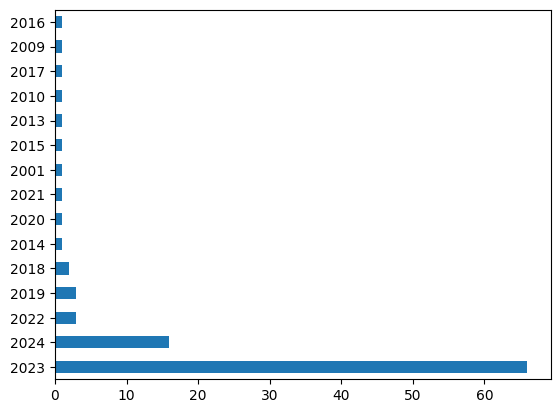

In [ ]:
import matplotlib.pyplot as plt
movies['Release_Year'].value_counts().plot(kind='barh')

However, we need to change the data type 'Release_Year', 'Rating' columns.

In [ ]:
# Convert 'Release_Year' to datetime and 'Rating' to float
movies['Release_Year'] = pd.to_datetime(movies['Release_Year'], format='%Y').dt.year
movies['Rating'] = pd.to_numeric(movies['Rating'], errors='coerce')

In [ ]:
movies

,Movie,Release_Year,Rating,Runtime,Streaming,Genre,Age_Rating,Production_Countries,Movie_Page_Link
0,Animal,2023,6.4,3h 21min,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",A,India,https://www.justwatch.com/in/movie/animal-2022
1,Salaar,2023,6.5,2h 55min,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",A,India,https://www.justwatch.com/in/movie/salaar
2,12th Fail,2023,9.1,2h 26min,Hotstar,Drama,Age rating not found,India,https://www.justwatch.com/in/movie/12th-fail
3,Sam Bahadur,2023,7.9,2h 30min,Zee5,"War & Military, Drama, History",UA,India,https://www.justwatch.com/in/movie/sam-bahadur
4,Aquaman and the Lost Kingdom,2023,5.7,2h 4min,Apple TV,"Action & Adventure, Fantasy, Science-Fiction",Age rating not found,United States,https://www.justwatch.com/in/movie/aquaman-and...
...,...,...,...,...,...,...,...,...,...
95,Top Gun: Maverick,2022,8.3,2h 10min,Apple TV,"Drama, Action & Adventure",UA,United States,https://www.justwatch.com/in/movie/top-gun-mav...
96,DD Returns,2023,6.2,2h 4min,Amazon Prime Video,"Horror, Comedy",UA,India,https://www.justwatch.com/in/movie/dd-returns
97,Manchester by the Sea,2016,7.8,2h 18min,Apple TV,Drama,A,United States,https://www.justwatch.com/in/movie/manchester-...
98,Main Atal Hoon,2024,7.5,2h 19min,Bookmyshow,Drama,UA,India,https://www.justwatch.com/in/movie/main-atal-hoon


# (a) Filter movies and TV shows based on:
(i) movies and series released in 2 years from current date (i.e., movies & series of 2023, 2024)

(ii)  movies & series that are rated 7 or higher.

**(i) Recent Movies & Series**

In [ ]:
# Filter DataFrame for movies released in 2023 and 2024
recent_movies = movies[(movies['Release_Year'] == 2023) | (movies['Release_Year'] == 2024)]

In [ ]:
recent_movies

,Movie,Release_Year,Rating,Runtime,Streaming,Genre,Age_Rating,Production_Countries,Movie_Page_Link
0,Animal,2023,6.4,3h 21min,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",A,India,https://www.justwatch.com/in/movie/animal-2022
1,Salaar,2023,6.5,2h 55min,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",A,India,https://www.justwatch.com/in/movie/salaar
2,12th Fail,2023,9.1,2h 26min,Hotstar,Drama,Age rating not found,India,https://www.justwatch.com/in/movie/12th-fail
3,Sam Bahadur,2023,7.9,2h 30min,Zee5,"War & Military, Drama, History",UA,India,https://www.justwatch.com/in/movie/sam-bahadur
4,Aquaman and the Lost Kingdom,2023,5.7,2h 4min,Apple TV,"Action & Adventure, Fantasy, Science-Fiction",Age rating not found,United States,https://www.justwatch.com/in/movie/aquaman-and...
...,...,...,...,...,...,...,...,...,...
92,Fast X,2023,5.8,2h 22min,Apple TV,"Action & Adventure, Crime, Mystery & Thriller",UA,United States,https://www.justwatch.com/in/movie/fast-x
94,The Nun II,2023,5.6,1h 50min,Apple TV,"Horror, Mystery & Thriller",A,United States,https://www.justwatch.com/in/movie/the-nun-ii
96,DD Returns,2023,6.2,2h 4min,Amazon Prime Video,"Horror, Comedy",UA,India,https://www.justwatch.com/in/movie/dd-returns
98,Main Atal Hoon,2024,7.5,2h 19min,Bookmyshow,Drama,UA,India,https://www.justwatch.com/in/movie/main-atal-hoon


In [ ]:
recent_movies.shape

(82, 9)

## **Thus, the there are 80 movies released in 2023 and 2024**

In [ ]:
series.shape

(100, 9)

In [ ]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Series                100 non-null    object
 1   Release_Year          100 non-null    object
 2   Rating                100 non-null    object
 3   Runtime               100 non-null    object
 4   Streaming             100 non-null    object
 5   Genre                 100 non-null    object
 6   Age_Rating            100 non-null    object
 7   Production_Countries  100 non-null    object
 8   Series_Link           100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


The **series** dataset has information of 100 movies

In [ ]:
# Convert 'Release_Year' to datetime and 'Rating' to float
series['Release_Year'] = pd.to_datetime(series['Release_Year'], format='%Y').dt.year
series['Rating'] = pd.to_numeric(series['Rating'], errors='coerce')

In [ ]:
# Filter DataFrame for TV shows released in 2023 and 2024
recent_series = series[(series['Release_Year'] == 2023) | (series['Release_Year'] == 2024)]

In [ ]:
recent_series

,Series,Release_Year,Rating,Runtime,Streaming,Genre,Age_Rating,Production_Countries,Series_Link
0,Indian Police Force,2024,6.0,38min,Amazon Prime Video,"Action & Adventure, Crime",A,India,https://www.justwatch.com/in/tv-show/indian-po...
6,Solo Leveling,2024,8.4,24min,Crunchyroll,"Animation, Action & Adventure, Fantasy, Scienc...",Age rating not found,"Japan, South Korea",https://www.justwatch.com/in/tv-show/solo-leve...
7,Death and Other Details,2024,7.0,47min,Hotstar,"Mystery & Thriller, Drama, Crime",Age rating not found,United States,https://www.justwatch.com/in/tv-show/death-and...
12,Killer Soup,2024,6.3,50min,Netflix,"Comedy, Drama, Mystery & Thriller",Age rating not found,India,https://www.justwatch.com/in/tv-show/killer-soup
14,Mr. & Mrs. Smith,2024,6.9,49min,Amazon Prime Video,"Drama, Comedy, Action & Adventure, Mystery & T...",Age rating not found,United States,https://www.justwatch.com/in/tv-show/mr-and-mr...
15,Farzi,2023,8.4,56min,Amazon Prime Video,"Crime, Drama, Mystery & Thriller",Age rating not found,India,https://www.justwatch.com/in/tv-show/farzi
16,The Last of Us,2023,8.8,58min,Jio Cinema,"Drama, Horror, Science-Fiction, Mystery & Thri...",A,United States,https://www.justwatch.com/in/tv-show/the-last-...
17,Berlin,2023,7.0,48min,Netflix,"Crime, Drama, Action & Adventure, Mystery & Th...",Age rating not found,Spain,https://www.justwatch.com/in/tv-show/berlin
23,Monarch: Legacy of Monsters,2023,7.0,46min,Apple TV Plus,"Drama, Science-Fiction, Action & Adventure",Age rating not found,United States,https://www.justwatch.com/in/tv-show/monarch-l...
24,Griselda,2024,7.3,55min,Netflix,"Crime, Drama",Age rating not found,United States,https://www.justwatch.com/in/tv-show/griselda


In [ ]:
recent_series.shape

(34, 9)

## **we have 37 series released in 2023 and 2024**

**(ii) High rated movies & series**

In [ ]:
# Filter movies and TV shows with an IMDb rating of 7 or higher
high_rated_movies = movies[movies['Rating'] >= 7.0]
high_rated_series = series[series['Rating'] >= 7.0]

In [ ]:
#Saving the filtered dataframe
filtered_movies = recent_movies[recent_movies['Rating'] >= 7.0]
filtered_series = recent_series[recent_series['Rating'] >= 7.0]

In [ ]:
filtered_movies.shape

(43, 9)

In [ ]:
filtered_series.shape

(27, 9)



*   The **filtered_movies** dataframe consists all the movies rated 7 and higher that are released in 2023 and 2024 (=43 movies)  
*    The **filtered_series** dataframe consists all the movies rated 7 and higher that are released in 2023 and 2024 (=27 series)



## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

### (a) Movies

In [ ]:
# Write Your Code here
recent_movies['Rating'].mean()

6.9604938271604935

### (b) Series

In [ ]:
recent_series['Rating'].mean()

7.45

On an average, a movie is rated 6.9 out of 10; whereas a series is rated 7.3 out of 10. This infers the average rating for a series is higher than that of movies.

## **Analyzing Top Genres**

### (a) Movies

What are the different genres of movies available?

In [ ]:
recent_movies['Genre'].unique()

array(['Action & Adventure, Crime, Drama, Mystery & Thriller',
       'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama',
       'War & Military, Drama, History',
       'Action & Adventure, Fantasy, Science-Fiction',
       'Comedy, Fantasy, Action & Adventure', 'Comedy, Drama',
       'Drama, History', 'Action & Adventure, Drama, Kids & Family',
       'Drama, Romance, Kids & Family',
       'Mystery & Thriller, Action & Adventure, Drama', 'Romance, Drama',
       'Action & Adventure, Science-Fiction, Fantasy',
       'Mystery & Thriller, Drama',
       'Action & Adventure, Mystery & Thriller, War & Military',
       'Crime, History, Drama, Romance, Western', 'Comedy, Romance',
       'Action & Adventure, Drama, Mystery & Thriller',
       'Action & Adventure, Mystery & Thriller',
       'Mystery & Thriller, Action & Adventure',
       'Mystery & Thriller, Drama, Action & Adventure',
       'Animation, Action & Adventure, Comedy, Kids & Family, Fantasy',
       'Mystery 

In [ ]:
x=recent_movies['Genre'].unique()
len(x)

63

There're **65** different genres of movies available.

What are the topmost genres with respects to the number of movies?

In [ ]:
top_movies_genres=recent_movies['Genre'].value_counts().sort_values(ascending=False).reset_index()
top_movies_genres

,index,Genre
0,Drama,7
1,"Comedy, Drama",3
2,"Action & Adventure, Mystery & Thriller",3
3,"Horror, Mystery & Thriller",3
4,"Action & Adventure, Crime, Drama, Mystery & Th...",2
...,...,...
58,"Action & Adventure, Drama, Mystery & Thriller,...",1
59,"Fantasy, Animation, Comedy, Kids & Family",1
60,"Science-Fiction, Action & Adventure, Fantasy",1
61,"Drama, History, War & Military",1


**Drama, Drama with Mystery thrill** has the highest numbers of movies; therefore these are the topmost Genres w.r.t volume of movies

#visualizing in wordcloud

In [ ]:
#Let's Visvalize it using word cloud
!pip install WordCloud


In [ ]:
from wordcloud import WordCloud, STOPWORDS


In [ ]:
text=movies['Genre'].str.cat(sep=' ')

In [ ]:
text

'Action & Adventure, Crime, Drama, Mystery & Thriller Drama, Mystery & Thriller, Action & Adventure, Crime Drama War & Military, Drama, History Action & Adventure, Fantasy, Science-Fiction Comedy, Fantasy, Action & Adventure Comedy, Drama Drama, History Action & Adventure, Drama, Kids & Family Drama, Romance, Kids & Family Mystery & Thriller, Action & Adventure, Drama Romance, Drama Action & Adventure, Science-Fiction, Fantasy Mystery & Thriller, Drama Drama Action & Adventure, Mystery & Thriller, War & Military Crime, History, Drama, Romance, Western Mystery & Thriller, Drama Comedy, Romance Action & Adventure, Drama, Mystery & Thriller Action & Adventure, Mystery & Thriller Mystery & Thriller, Action & Adventure Action & Adventure, Mystery & Thriller Mystery & Thriller, Drama, Action & Adventure Animation, Action & Adventure, Comedy, Kids & Family, Fantasy Drama Mystery & Thriller, Crime, Drama Drama, Mystery & Thriller, History Fantasy, Comedy, Action & Adventure Action & Adventure,

In [ ]:
stopwords=set(STOPWORDS)
rev_words=['&']
rev_stopwords=stopwords.union(rev_words)

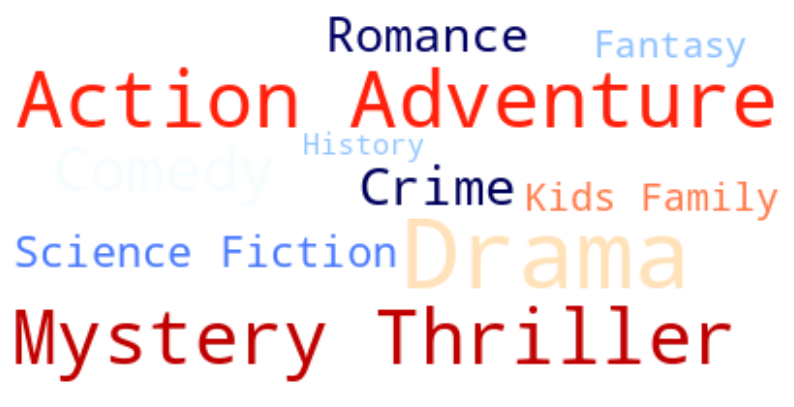

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
wordcloud=WordCloud(max_font_size=50, max_words=10, background_color='white', stopwords=rev_stopwords, colormap='flag').generate(text)
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Clearly, **'DRAMA'**, **'MYSTERY THRILLER'** highlighted in larger fonts indicating these are the topmost genres.

What are the topmost genres with respects to the mean ratings received?

In [ ]:
#Movies
recent_movies.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

,Genre,Rating
0,"Action & Adventure, Science-Fiction, Animation...",8.6
1,"Comedy, Fantasy, Action & Adventure",8.5
2,"Drama, History",8.4
3,"Horror, Action & Adventure, Science-Fiction, D...",8.3
4,"Drama, Romance, Kids & Family",8.2
...,...,...
58,"Action & Adventure, Science-Fiction, Fantasy",5.6
59,"Action & Adventure, Comedy, Crime, Drama, Myst...",5.5
60,"Action & Adventure, Comedy, Romance",5.4
61,"Drama, Crime, Action & Adventure, Comedy",5.2


**Science-Fiction, Animation, Action & Adventure, Fantasy, Comedy, Kids & Family** is the highest rated Genre.

In [ ]:
# Get the mean rating for 'Drama' category
mean_rating_drama = recent_movies[recent_movies['Genre'] == 'Drama']['Rating'].mean()
print(mean_rating_drama)

7.6571428571428575


The **"Drama"** Genre which was th4e topmost genre with respect to volume of movies produced; has an average rating of **7.7**

### (b) Series

What are the different genres of series available?

In [ ]:
recent_series['Genre'].unique()

array(['Action & Adventure, Crime',
       'Animation, Action & Adventure, Fantasy, Science-Fiction',
       'Mystery & Thriller, Drama, Crime',
       'Comedy, Drama, Mystery & Thriller',
       'Drama, Comedy, Action & Adventure, Mystery & Thriller, Crime',
       'Crime, Drama, Mystery & Thriller',
       'Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure',
       'Crime, Drama, Action & Adventure, Mystery & Thriller',
       'Drama, Science-Fiction, Action & Adventure', 'Crime, Drama',
       'Action & Adventure, Mystery & Thriller, Drama',
       'War & Military, Drama, Mystery & Thriller, Action & Adventure',
       'Drama, Fantasy, Romance, Comedy, Science-Fiction',
       'Science-Fiction, Comedy, Drama, Fantasy, Romance',
       'Drama, History, Mystery & Thriller', 'Drama', 'Comedy',
       'Drama, Action & Adventure, Science-Fiction, Kids & Family, Fantasy',
       'Science-Fiction, Drama, Comedy, Fantasy, Mystery & Thriller, Action & Adventure',
       

In [ ]:
len(recent_series['Genre'].unique())

30

There're **32** different genres of series produced in 2023 and 2024.

What are the topmost genres with respect to the number of series produced?

In [ ]:
top_series_genres=recent_series['Genre'].value_counts().sort_values(ascending=False).reset_index()


In [ ]:
top_series_genres

,index,Genre
0,Drama,2
1,"Crime, Drama, Mystery & Thriller",2
2,"Drama, Mystery & Thriller",2
3,"Comedy, Drama, Mystery & Thriller",2
4,"Animation, Action & Adventure, Fantasy, Scienc...",1
5,"Mystery & Thriller, Drama, Crime",1
6,"Drama, Comedy, Action & Adventure, Mystery & T...",1
7,"Drama, Horror, Science-Fiction, Mystery & Thri...",1
8,"Crime, Drama, Action & Adventure, Mystery & Th...",1
9,"Drama, Science-Fiction, Action & Adventure",1


Maximum no. of web series were produced in **Drama, Crime, Mystery Thrillers** genres.

#Visualization in word cloud

In [ ]:
#Let's Visvalize it using word cloud
text1=series['Genre'].str.cat(sep=' ')

In [ ]:
text1

'Action & Adventure, Crime Drama, Mystery & Thriller, Crime Crime, Action & Adventure, Mystery & Thriller, Drama Action & Adventure, Crime, Drama, Mystery & Thriller Drama, Action & Adventure, Science-Fiction, Fantasy Comedy, Drama Animation, Action & Adventure, Fantasy, Science-Fiction Mystery & Thriller, Drama, Crime Reality TV, Kids & Family Animation, Action & Adventure, Fantasy Drama, Western Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction Comedy, Drama, Mystery & Thriller Drama Drama, Comedy, Action & Adventure, Mystery & Thriller, Crime Crime, Drama, Mystery & Thriller Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure Crime, Drama, Action & Adventure, Mystery & Thriller Science-Fiction, Drama, Action & Adventure, Romance Drama, Comedy, Fantasy Drama, Comedy Action & Adventure, Crime, Drama, Mystery & Thriller, Made in Europe Mystery & Thriller, Crime, Drama Drama, Science-Fiction, Action & Adventure Crime, Drama Action & Adventure

In [ ]:
stopwords=set(STOPWORDS)
rev_words=['&']
rev_stopwords=stopwords.union(rev_words)

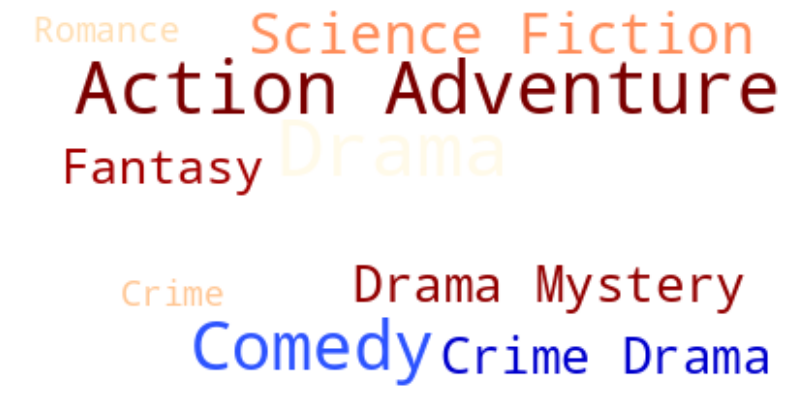

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
wordcloud=WordCloud(max_font_size=50, max_words=10, background_color='white', stopwords=rev_stopwords, colormap='flag').generate(text1)
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

What are the topmost genres with respects to the mean ratings received?

In [ ]:
#Series
recent_series.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

,Genre,Rating
0,"Drama, Horror, Science-Fiction, Mystery & Thri...",8.80
1,"Drama, Science-Fiction, Fantasy",8.70
2,"Drama, History, Mystery & Thriller",8.50
3,"Action & Adventure, Science-Fiction, Drama, Fa...",8.40
4,"Animation, Action & Adventure, Fantasy, Scienc...",8.40
5,"Science-Fiction, Drama, Comedy, Fantasy, Myste...",8.10
6,"Action & Adventure, Mystery & Thriller, Drama",8.10
7,"Drama, Fantasy, Romance, Comedy, Science-Fiction",8.00
8,Comedy,8.00
9,"Romance, Comedy, Drama",8.00


**Drama, Horror, Science-Fiction, Mystery & Thriller** is the highest rated genre (**8.8 ratings**)

In [ ]:
#Mean rating of the topmost genre with highest series produced
a = recent_series[recent_series['Genre'] == 'Drama, Crime']['Rating'].mean()
print(a)

7.9


on an average, **"Drama Crime"** genre of series receives a rating of **7.6**.

## **Finding Predominant Streaming Service**

**Determine the streaming service with the most significant number of offerings.**

###(a) Movies

In [ ]:

recent_movies['Streaming'].value_counts().sort_values(ascending=False)


Streaming services not found    17
Amazon Prime Video              17
Apple TV                        16
Netflix                         14
Hotstar                          5
Bookmyshow                       4
Zee5                             2
Apple TV Plus                    2
Amazon Video                     2
Sun Nxt                          1
Lionsgate Play                   1
Sony Liv                         1
Name: Streaming, dtype: int64

Although a larger chunk of movies streaming service is unknown, **Amazon Prime Videos** has been a predominant choice for streaming movies.

In [ ]:
#Let's Visvalize it using word cloud
text=movies['Streaming'].str.cat(sep=' ')

In [ ]:
text

'Netflix Netflix Hotstar Zee5 Apple TV Streaming services not found Bookmyshow Apple TV Netflix Netflix Amazon Prime Video Amazon Prime Video Apple TV Hotstar Streaming services not found Streaming services not found Apple TV Plus Hotstar Bookmyshow Amazon Prime Video Apple TV Apple TV Amazon Prime Video Bookmyshow Amazon Video Amazon Prime Video Streaming services not found Netflix Apple TV Netflix Sun Nxt Amazon Prime Video Streaming services not found Amazon Prime Video Amazon Video Streaming services not found Lionsgate Play Apple TV Netflix Apple TV Streaming services not found Netflix Apple TV Amazon Prime Video Voot Hotstar Apple TV Streaming services not found Apple TV Amazon Prime Video Apple TV Apple TV Apple TV Plus Hotstar Amazon Prime Video Streaming services not found Amazon Prime Video Streaming services not found Netflix Netflix Apple TV Netflix Netflix Netflix Lionsgate Play Streaming services not found Netflix Zee5 Apple TV Amazon Prime Video Streaming services not fo

In [ ]:
stopwords=set(STOPWORDS)
rev_words=['not found, found, Streaming services']
rev_stopwords=stopwords.union(rev_words)

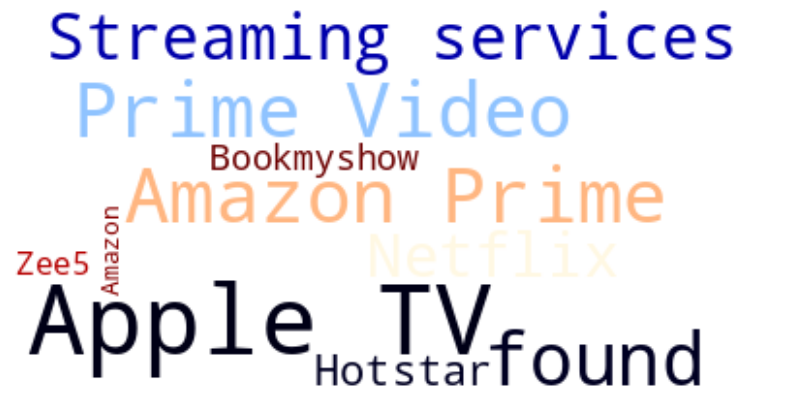

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
wordcloud=WordCloud(max_font_size=50, max_words=10, background_color='white', stopwords=rev_stopwords, colormap='flag').generate(text)
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###(b) Series

In [ ]:
recent_series['Streaming'].value_counts().sort_values(ascending=False)

Netflix                         13
Amazon Prime Video               7
Hotstar                          3
Apple TV Plus                    3
Crunchyroll                      2
Streaming services not found     2
Jio Cinema                       1
Amazon miniTV                    1
Sony Liv                         1
Lionsgate Play                   1
Name: Streaming, dtype: int64

**Netflix** is predominant choice for streaming web series.

In [ ]:
#Let's Visualize it using word cloud

text=series['Streaming'].str.cat(sep=' ')

In [ ]:
stopwords=set(STOPWORDS)
rev_words=['not found, Streaming services']
rev_stopwords=stopwords.union(rev_words)

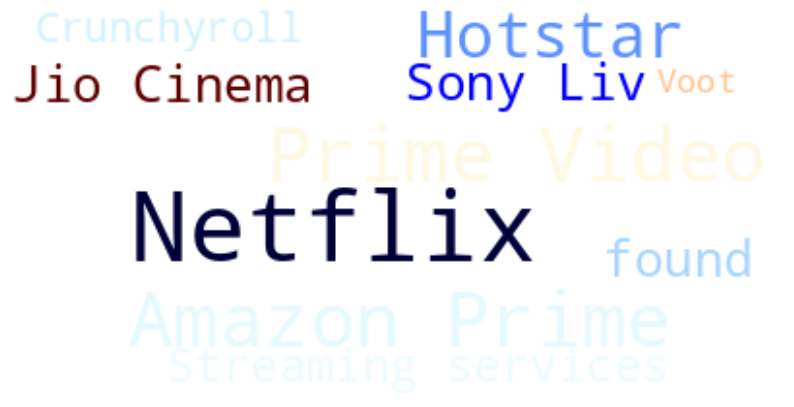

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
wordcloud=WordCloud(max_font_size=50, max_words=10, background_color='white', stopwords=rev_stopwords, colormap='flag').generate(text)
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format. Dump the filtered and analysed data into a CSV file for further processing and reporting.
movies.to_csv('Finalized_Movies.csv', index=False)
series.to_csv('Finalized_Series.csv', index=False)


In [ ]:
#saving filter data as Filter Data in csv format

filtered_movies.to_csv('Filtered_Movies.csv', index=False)
filtered_series.to_csv('Filtered_Series.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**
https://drive.google.com/drive/folders/1CGMmwV74T8dpwtPxStAZ-GNR4R0cVU7U?usp=drive_link


# ***Congratulations!!! You have completed your Assignment.***